# 一起来打怪之 Credit Scoring 练习

# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


## 信用评分的机器学习

银行在市场经济中扮演着至关重要的角色。它们决定谁可以获得融资以及融资条件，并能够左右投资决策的成败。为了市场和社会的正常运转，个人和公司需要获得信贷。

信用评分算法是银行用来确定是否应该授予贷款的方法，它们通过猜测违约的概率来进行评估。本次竞赛要求参与者改进信用评分的最新技术水平，通过预测某人在未来两年内是否会遭遇财务困境来评估信用风险。

属性信息：

|变量名	|	描述	|	类型|
|----|----|----|
|SeriousDlqin2yrs	|	个人是否在过去90天中出现过逾期90天或更糟的情况	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	未担保信贷额度的余额占比	|	百分比|
|age	|	借款人的年龄	|	整数|
|NumberOfTime30-59DaysPastDueNotWorse	|	借款人逾期30-59天的次数	|	整数|
|DebtRatio	|	月债务支付比例	|	百分比|
|MonthlyIncome	|	月收入	|	实数|
|NumberOfOpenCreditLinesAndLoans	|	未结清贷款和信用额度的数量	|	整数|
|NumberOfTimes90DaysLate	|	借款人逾期90天或更长时间的次数	|	整数|
|NumberRealEstateLoansOrLines	|	抵押贷款和房地产贷款的数量	|	整数|
|NumberOfTime60-89DaysPastDueNotWorse	|	借款人逾期60-89天的次数	|	整数|
|NumberOfDependents	|	家庭中的家属数量	|	整数|



----------
## Read the data into Pandas 

In [72]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile

with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)

data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [81]:
#公共import区
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [74]:
data.shape

(112915, 11)

------------
## Drop na

In [75]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [76]:
data.dropna(inplace=True)
data.shape

(108648, 11)

---------
## Create X and y

In [77]:
y = data['SeriousDlqin2yrs']
x = data.drop('SeriousDlqin2yrs', axis=1)

In [78]:
print(y.mean())
print(x.shape)
print(y.shape)

0.06742876076872101
(108648, 10)
(108648,)


---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [62]:
## your code here
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)



----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

C:\Users\huang\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


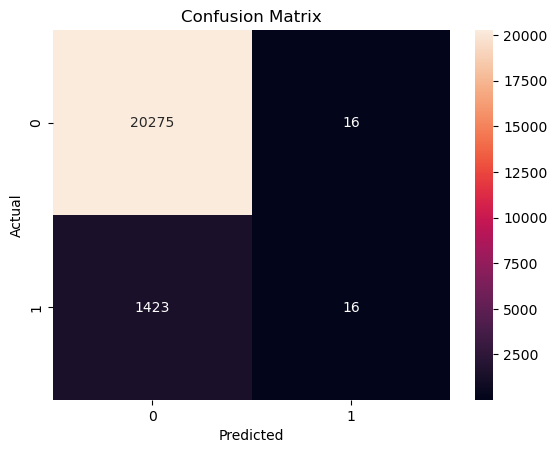

In [108]:
## your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression()

# 在训练集上拟合模型
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)



# 绘制混淆矩阵
cm_Logisticregression = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_Logisticregression, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




# 关于模型预测的结果
* 真阳性（模型正确预测为正类的样本数）
* 假阴性（模型错误地将正类预测为负类的样本数）
* 假阳性（模型错误地将负类预测为正类的样本数）
* 真阴性（模型正确预测为负类的样本数）
* 真阴性+真阳性 means 预测正确数/正确率

In [100]:
#通用计算定义:
#真阳性率(True Positive Rate)
#假阳性率(False Positive Rate)
#真阴性率(True Negative Rate，也称为特异性)
#假阴性率(False Negative Rate)
def true_positive_rate(confusion_matrix):
    TP = confusion_matrix[1, 1]
    FN = confusion_matrix[1, 0]
    return TP / (TP + FN)

def false_positive_rate(confusion_matrix):
    FP = confusion_matrix[0, 1]
    TN = confusion_matrix[0, 0]
    return FP / (FP + TN)

def true_negative_rate(confusion_matrix):
    FP = confusion_matrix[0, 1]
    TN = confusion_matrix[0, 0]
    return TN / (FP + TN)

def false_negative_rate(confusion_matrix):
    TP = confusion_matrix[1, 1]
    FN = confusion_matrix[1, 0]
    return FN / (TP + FN)

def Right_rate(confusion_matrix):
    R = confusion_matrix[0, 0] + confusion_matrix[1, 1]
    all = confusion_matrix[0, 0] + confusion_matrix[1, 1] + confusion_matrix[0, 1] + confusion_matrix[1, 0]
    return R/all

In [102]:
print("真阳性率(True Positive Rate):",true_positive_rate(cm_Logisticregression))
print("假阳性率(False Positive Rate):",false_positive_rate(cm_Logisticregression))
print("真阴性率(True Negative Rate):",true_negative_rate(cm_Logisticregression))
print("假阴性率(False Negative Rate)",false_negative_rate(cm_Logisticregression))
print("模型预测正确率：",Right_rate(cm_Logisticregression))

真阳性率(True Positive Rate): 0.011118832522585128
假阳性率(False Positive Rate): 0.0007885269331230595
真阴性率(True Negative Rate): 0.999211473066877
假阴性率(False Negative Rate) 0.9888811674774148
模型预测正确率： 0.9337781868384721


### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

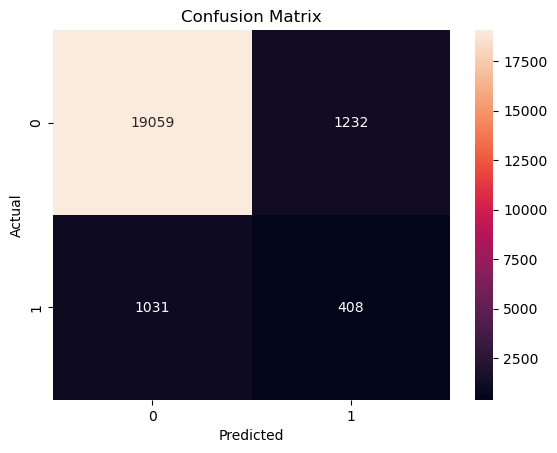

In [107]:
## your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# 创建Decision Tree模型
model = DecisionTreeClassifier()

# 在训练集上拟合模型
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)



# 绘制混淆矩阵
cm_DT = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [103]:
print("真阳性率(True Positive Rate):",true_positive_rate(cm_DT))
print("假阳性率(False Positive Rate):",false_positive_rate(cm_DT))
print("真阴性率(True Negative Rate):",true_negative_rate(cm_DT))
print("假阴性率(False Negative Rate)",false_negative_rate(cm_DT))
print("模型预测正确率：",Right_rate(cm_DT))

真阳性率(True Positive Rate): 0.27241139680333565
假阳性率(False Positive Rate): 0.06130796905031787
真阴性率(True Negative Rate): 0.9386920309496821
假阴性率(False Negative Rate) 0.7275886031966643
模型预测正确率： 0.8945697192820985


### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

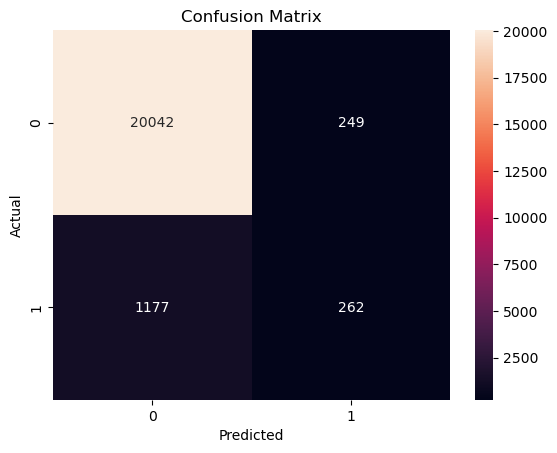

In [105]:
## your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# 创建模型
model = RandomForestClassifier()

# 在训练集上拟合模型
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)


# 绘制混淆矩阵
cm_RF = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_RF, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [109]:
print("真阳性率(True Positive Rate):",true_positive_rate(cm_RF))
print("假阳性率(False Positive Rate):",false_positive_rate(cm_RF))
print("真阴性率(True Negative Rate):",true_negative_rate(cm_RF))
print("假阴性率(False Negative Rate)",false_negative_rate(cm_RF))
print("模型预测正确率：",Right_rate(cm_RF))

真阳性率(True Positive Rate): 0.18207088255733148
假阳性率(False Positive Rate): 0.012271450396727614
真阴性率(True Negative Rate): 0.9877285496032724
假阴性率(False Negative Rate) 0.8179291174426685
模型预测正确率： 0.9343764381040037


### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

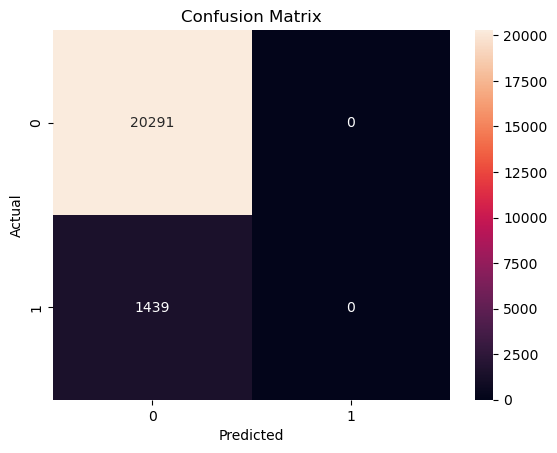

In [112]:
## your code here
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# 创建模型
model = SVC()

# 在训练集上拟合模型
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)


# 绘制混淆矩阵
cm_SVC = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_SVC, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [113]:
print("真阳性率(True Positive Rate):",true_positive_rate(cm_SVC))
print("假阳性率(False Positive Rate):",false_positive_rate(cm_SVC))
print("真阴性率(True Negative Rate):",true_negative_rate(cm_SVC))
print("假阴性率(False Negative Rate)",false_negative_rate(cm_SVC))
print("模型预测正确率：",Right_rate(cm_SVC))

真阳性率(True Positive Rate): 0.0
假阳性率(False Positive Rate): 0.0
真阴性率(True Negative Rate): 1.0
假阴性率(False Negative Rate) 1.0
模型预测正确率： 0.9337781868384721


### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

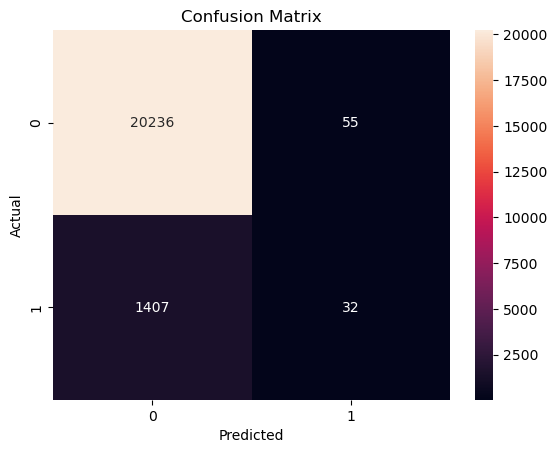

In [114]:
## your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# 创建模型
model = KNeighborsClassifier()

# 在训练集上拟合模型
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)


# 绘制混淆矩阵
cm_KNeighborsClassifier = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_KNeighborsClassifier, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [115]:
print("真阳性率(True Positive Rate):",true_positive_rate(cm_KNeighborsClassifier))
print("假阳性率(False Positive Rate):",false_positive_rate(cm_KNeighborsClassifier))
print("真阴性率(True Negative Rate):",true_negative_rate(cm_KNeighborsClassifier))
print("假阴性率(False Negative Rate)",false_negative_rate(cm_KNeighborsClassifier))
print("模型预测正确率：",Right_rate(cm_KNeighborsClassifier))

真阳性率(True Positive Rate): 0.022237665045170257
假阳性率(False Positive Rate): 0.002710561332610517
真阴性率(True Negative Rate): 0.9972894386673895
假阴性率(False Negative Rate) 0.9777623349548298
模型预测正确率： 0.9327197422917626


---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [116]:
#上面都写了准确率0.0
#Logistic regression的各种率
print("真阳性率(True Positive Rate):",true_positive_rate(cm_Logisticregression))
print("假阳性率(False Positive Rate):",false_positive_rate(cm_Logisticregression))
print("真阴性率(True Negative Rate):",true_negative_rate(cm_Logisticregression))
print("假阴性率(False Negative Rate)",false_negative_rate(cm_Logisticregression))
print("模型预测正确率：",Right_rate(cm_Logisticregression))

真阳性率(True Positive Rate): 0.011118832522585128
假阳性率(False Positive Rate): 0.0007885269331230595
真阴性率(True Negative Rate): 0.999211473066877
假阴性率(False Negative Rate) 0.9888811674774148
模型预测正确率： 0.9337781868384721


### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [119]:
## your code here
#Decision Tree的各种率
print("真阳性率(True Positive Rate):",true_positive_rate(cm_DT))
print("假阳性率(False Positive Rate):",false_positive_rate(cm_DT))
print("真阴性率(True Negative Rate):",true_negative_rate(cm_DT))
print("假阴性率(False Negative Rate)",false_negative_rate(cm_DT))
print("模型预测正确率：",Right_rate(cm_DT))

真阳性率(True Positive Rate): 0.28353022932592076
假阳性率(False Positive Rate): 0.06071657385047558
真阴性率(True Negative Rate): 0.9392834261495244
假阴性率(False Negative Rate) 0.7164697706740792
模型预测正确率： 0.8958582604693971


### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [120]:
## your code here
#随机森林的各种率
print("真阳性率(True Positive Rate):",true_positive_rate(cm_RF))
print("假阳性率(False Positive Rate):",false_positive_rate(cm_RF))
print("真阴性率(True Negative Rate):",true_negative_rate(cm_RF))
print("假阴性率(False Negative Rate)",false_negative_rate(cm_RF))
print("模型预测正确率：",Right_rate(cm_RF))

真阳性率(True Positive Rate): 0.18207088255733148
假阳性率(False Positive Rate): 0.012271450396727614
真阴性率(True Negative Rate): 0.9877285496032724
假阴性率(False Negative Rate) 0.8179291174426685
模型预测正确率： 0.9343764381040037


### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [125]:
## your code here
#SVM的各种率
print("真阳性率(True Positive Rate):",true_positive_rate(cm_SVC))
print("假阳性率(False Positive Rate):",false_positive_rate(cm_SVC))
print("真阴性率(True Negative Rate):",true_negative_rate(cm_SVC))
print("假阴性率(False Negative Rate)",false_negative_rate(cm_SVC))
print("模型预测正确率：",Right_rate(cm_SVC))

真阳性率(True Positive Rate): 0.0
假阳性率(False Positive Rate): 0.0
真阴性率(True Negative Rate): 1.0
假阴性率(False Negative Rate) 1.0
模型预测正确率： 0.9337781868384721


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [124]:
## your code here
#KNN的各种率
print("真阳性率(True Positive Rate):",true_positive_rate(cm_KNeighborsClassifier))
print("假阳性率(False Positive Rate):",false_positive_rate(cm_KNeighborsClassifier))
print("真阴性率(True Negative Rate):",true_negative_rate(cm_KNeighborsClassifier))
print("假阴性率(False Negative Rate)",false_negative_rate(cm_KNeighborsClassifier))
print("模型预测正确率：",Right_rate(cm_KNeighborsClassifier))

真阳性率(True Positive Rate): 0.022237665045170257
假阳性率(False Positive Rate): 0.002710561332610517
真阴性率(True Negative Rate): 0.9972894386673895
假阴性率(False Negative Rate) 0.9777623349548298
模型预测正确率： 0.9327197422917626


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [123]:
## your code here
#坏了我在上面都写了0.0

## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

In [138]:
## your code here
#调参调参
from sklearn.metrics import accuracy_score


# 创建Logistic Regression模型
model = LogisticRegression()

# 在训练集上拟合模型
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)


        
# 将预测概率转换为类别
threshold = 0.3
y_pred_threshold = np.where(model.predict_proba(x_test)[:, 1] >= threshold, 1, 0)

# 计算准确率和召回率
accuracy = accuracy_score(y_test, y_pred_threshold)
print("当前参数(threshold)为：",threshold)
print("调后Accuracy: ",accuracy)

print("不调参时模型预测正确率：",Right_rate(cm_Logisticregression))

当前参数(threshold)为： 0.3
调后Accuracy:  0.9329958582604694
不调参时模型预测正确率： 0.9337781868384721


C:\Users\huang\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:


# 创建Logistic Regression模型
model = KNeighborsClassifier()

# 在训练集上拟合模型
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)


        
# 将预测概率转换为类别
threshold = 0.8
y_pred_threshold = np.where(model.predict_proba(x_test)[:, 1] >= threshold, 1, 0)

# 计算准确率和召回率
accuracy = accuracy_score(y_test, y_pred_threshold)
print("当前参数(threshold)为：",threshold)
print("调后Accuracy: ",accuracy)

print("不调参时模型预测正确率：",Right_rate(cm_KNeighborsClassifier))

当前参数(threshold)为： 0.8
调后Accuracy:  0.9336861481822365
不调参时模型预测正确率： 0.9327197422917626


* 其他模型只需要把model改一下代码一样的，期末事情多不一一调了嘻嘻
* 其实感觉对比调参前后的cm图更直观，可以看到[0,0]和[1,1]的变化

C:\Users\huang\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


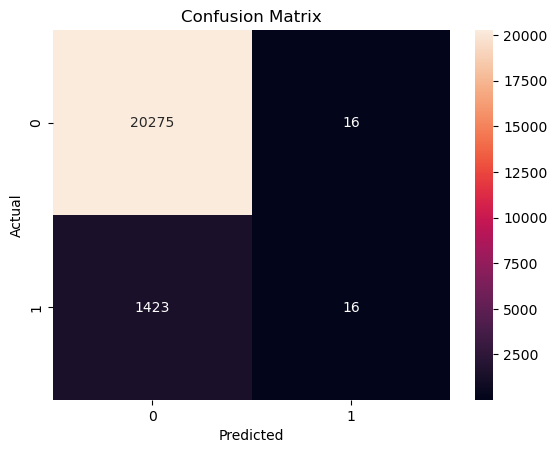

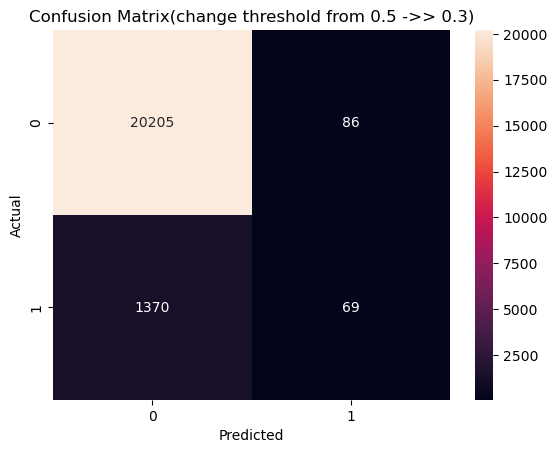

In [145]:
#for example
model = LogisticRegression()

# 在训练集上拟合模型
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)

#调参
threshold = 0.3
y_pred_threshold = np.where(model.predict_proba(x_test)[:, 1] >= threshold, 1, 0)


# 绘制混淆矩阵
cm_Logisticregression = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_Logisticregression, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

cm_Logisticregression_threshold = confusion_matrix(y_test, y_pred_threshold )
sns.heatmap(cm_Logisticregression_threshold, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(change threshold from 0.5 ->> 0.3)')
plt.show()


* we can see very clearly that [0,0]少了,[1,1]多了
* so,调参后导致accuracy变大不一定好
* 更应该根据实际情况去调参，如宁杀错(1)勿放过的时候应该追求[1,1]准确